    Afzal Patel
    
    This notebook is an analysis of United Nations Speeches from 1970 to 2015

In [1]:
#required modules and packages

import pandas as pd
import string
from altair import Chart, X, Y, Color, Scale
import altair as alt
#!pip install nltk
import nltk
from nltk.corpus import stopwords
import wordcloud
#from textatistic import Textatistic
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sbn
from vega_datasets import data
import requests
from bs4 import BeautifulSoup
import numpy as np
from bs4 import BeautifulSoup
import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context
matplotlib.style.use('ggplot')  
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/afzal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/afzal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/afzal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
undf = pd.read_csv("un-general-debates.csv")
undf1 = undf

How do speeches in 1970 compare to those in 2015?

In [3]:
#1970 Analysis

speeches_1970 = undf[undf.year == 1970].copy()
speeches_1970['text'] = speeches_1970.text.apply(lambda x: x.lower())
speeches_1970['text'] = speeches_1970.text.apply(
    lambda x: x.translate(str.maketrans(
        string.punctuation, ' '*len(string.punctuation))))
speeches_1970['word_list'] = speeches_1970.text.apply(nltk.word_tokenize)

Most Common Words in 1970?

In [4]:
from collections import Counter
c = Counter(speeches_1970.word_list.sum())
c.most_common(10)

[('the', 25077),
 ('of', 16265),
 ('and', 9224),
 ('to', 9134),
 ('in', 6668),
 ('a', 4530),
 ('that', 3919),
 ('is', 3322),
 ('for', 2563),
 ('which', 2471)]

In [5]:
c.most_common()[-10:]

[('shabby', 1),
 ('predatory', 1),
 ('siphoned', 1),
 ('crop', 1),
 ('outflow', 1),
 ('ashes', 1),
 ('pr', 1),
 ('bystander', 1),
 ('antiimperialist', 1),
 ('earn', 1)]

In [6]:
#stop words, used in both analyses to filter from most common word lists

sw = set(stopwords.words('english'))
len(sw)

179

In [7]:
speeches_1970['word_list'] = speeches_1970.word_list.apply(
    lambda x: [y for y in x if y not in sw])

c = Counter(speeches_1970.word_list.sum())
c.most_common(25)

[('nations', 1997),
 ('united', 1996),
 ('international', 1251),
 ('world', 1101),
 ('peace', 1019),
 ('countries', 908),
 ('states', 897),
 ('organization', 763),
 ('would', 677),
 ('people', 649),
 ('development', 649),
 ('security', 594),
 ('general', 571),
 ('peoples', 567),
 ('assembly', 552),
 ('charter', 551),
 ('government', 544),
 ('one', 535),
 ('must', 474),
 ('also', 454),
 ('economic', 450),
 ('us', 401),
 ('years', 392),
 ('time', 371),
 ('great', 369)]

In [8]:
c.most_common()[-25:]

[('reliably', 1),
 ('polish', 1),
 ('sqon', 1),
 ('ultra', 1),
 ('nonapplicability', 1),
 ('statutory', 1),
 ('2391', 1),
 ('renovation', 1),
 ('russia', 1),
 ('gbout', 1),
 ('•', 1),
 ('prediction', 1),
 ('oceania', 1),
 ('fat', 1),
 ('1848th', 1),
 ('shabby', 1),
 ('predatory', 1),
 ('siphoned', 1),
 ('crop', 1),
 ('outflow', 1),
 ('ashes', 1),
 ('pr', 1),
 ('bystander', 1),
 ('antiimperialist', 1),
 ('earn', 1)]

Most Common Words in 2015?

In [9]:
#2015 Analysis

speeches_2015 = undf[undf.year == 2015].copy()
speeches_2015['text'] = speeches_2015.text.apply(lambda x: x.lower())
speeches_2015['text'] = speeches_2015.text.apply(
    lambda x: x.translate(str.maketrans(
        string.punctuation, ' '*len(string.punctuation))))
speeches_2015['word_list'] = speeches_2015.text.apply(nltk.word_tokenize)

In [10]:
d = Counter(speeches_2015.word_list.sum())
d.most_common(10)

[('the', 30833),
 ('of', 17302),
 ('and', 15956),
 ('to', 13798),
 ('in', 8963),
 ('that', 6892),
 ('a', 6605),
 ('we', 5777),
 ('is', 4599),
 ('for', 4428)]

In [11]:
d.most_common()[-10:]

[('225', 1),
 ('tougher', 1),
 ('hazard', 1),
 ('pillagers', 1),
 ('intrusion', 1),
 ('corrective', 1),
 ('remitting', 1),
 ('invoice', 1),
 ('payable', 1),
 ('limb', 1)]

In [12]:
speeches_2015['word_list'] = speeches_2015.word_list.apply(
    lambda x: [y for y in x if y not in sw])

d = Counter(speeches_2015.word_list.sum())
d.most_common(25)

[('nations', 2594),
 ('united', 2572),
 ('development', 1755),
 ('international', 1727),
 ('world', 1640),
 ('security', 1395),
 ('’', 1356),
 ('peace', 1286),
 ('people', 1242),
 ('countries', 1086),
 ('must', 1033),
 ('also', 1005),
 ('states', 999),
 ('human', 957),
 ('country', 915),
 ('us', 900),
 ('70', 857),
 ('global', 830),
 ('rights', 789),
 ('new', 745),
 ('sustainable', 739),
 ('years', 700),
 ('one', 699),
 ('climate', 683),
 ('—', 683)]

In [13]:
d.most_common()[-25:]

[('displeasing', 1),
 ('homosexual', 1),
 ('depart', 1),
 ('entertaining', 1),
 ('adult', 1),
 ('spouses', 1),
 ('clad', 1),
 ('inheritance', 1),
 ('myths', 1),
 ('falsehoods', 1),
 ('traction', 1),
 ('arresting', 1),
 ('incessant', 1),
 ('distracted', 1),
 ('exigency', 1),
 ('225', 1),
 ('tougher', 1),
 ('hazard', 1),
 ('pillagers', 1),
 ('intrusion', 1),
 ('corrective', 1),
 ('remitting', 1),
 ('invoice', 1),
 ('payable', 1),
 ('limb', 1)]

In [14]:
#Normalize 2015 Data

#2015
print(sum(d.values()) )
#list of tuples
x = d.most_common(20)

#list of lists
y = [list(ele) for ele in x] 

#before
#print(y)

for elem in y:
    val = elem[1]
    elem[1] = (val / 217965) * 100
  
print(y)

217965
[['nations', 1.1900993278737413], ['united', 1.1800059642603171], ['development', 0.8051751427981557], ['international', 0.7923290436537977], ['world', 0.7524143784552566], ['security', 0.6400110109421238], ['’', 0.6221182299910536], ['peace', 0.5900029821301586], ['people', 0.5698162549033101], ['countries', 0.4982451310990297], ['must', 0.47392930057578053], ['also', 0.46108320143142245], ['states', 0.4583304659004886], ['human', 0.4390613171839515], ['country', 0.4197921684674145], ['us', 0.41291032964007984], ['70', 0.39318239166838714], ['global', 0.38079508177918475], ['rights', 0.3619847223178033], ['new', 0.341797995090955]]


In [15]:
#find 2015 words in 1970 to compare
wordsin1970 = []

#y is list of top words for normalized 2015 data
for elem in y:
    #y is a list of lists
    
    #143095 words in 1970 list w/o stop words
    
    #top words in 2015 w/o stopwords
    word = elem[0]
    
    #normalized occurrences in 1970 for top word in 2015
    
    freq = d[word]
    newFreq = (freq / 143095) * 100
    
    newElem = [word,newFreq]
    wordsin1970.append(newElem)

print(wordsin1970)

[['nations', 1.8127817184387995], ['united', 1.7974073168174989], ['development', 1.2264579475173836], ['international', 1.206890527272092], ['world', 1.1460917572242217], ['security', 0.9748768300779204], ['’', 0.9476222090219785], ['peace', 0.8987036584087494], ['people', 0.8679548551661485], ['countries', 0.758936370942381], ['must', 0.7218980397637933], ['also', 0.7023306195185016], ['states', 0.6981376008945106], ['human', 0.6687864705265733], ['country', 0.6394353401586359], ['us', 0.6289527935986582], ['70', 0.598902826793389], ['global', 0.5800342429854293], ['rights', 0.5513819490548237], ['new', 0.5206331458122226]]


In [16]:
df1 = pd.DataFrame(y, columns = ['word', '2015'])  #2015 words
df2 = pd.DataFrame(wordsin1970, columns = ['word', '1970'])  #2015 words in 1970

In [17]:
#merge to dataframes above, where word is the unique identifier
df = df2.merge(df1[['word',"2015"]])

In [18]:
#save copy of old df
oldDF = df

#wide-form to long-form to graph with altair
df = df.melt(id_vars =['word'])
df = df.rename(columns={'variable': 'year'})
df

,word,year,value
0,nations,1970,1.812782
1,united,1970,1.797407
2,development,1970,1.226458
3,international,1970,1.206891
4,world,1970,1.146092
5,security,1970,0.974877
6,’,1970,0.947622
7,peace,1970,0.898704
8,people,1970,0.867955
9,countries,1970,0.758936


In [19]:
#graph a grouped bar chart to compare top 2015 UN speech words also found in 1970

#those same words were, overall, used more frequently in 1970

source = df

alt.Chart(source).mark_bar().encode(
    x='word:O',
    y='value:Q',
    color='year:N',
    column='site:N'
)

#Frequency Histogram

alt.Chart(...)

WordCloud visualizations for most common words in UN speeches in 1970 and 2015

In [20]:
wc2015 = d.most_common(20)
wc1970 = c.most_common(20)

In [21]:
wc2015_2 = []
wc1970_2 = []

for elem in wc2015:
    word = elem[0]
    wc2015_2.append(word)
    
for elem in wc1970:
    word = elem[0]
    wc1970_2.append(word)


In [22]:
print(wc1970_2)

['nations', 'united', 'international', 'world', 'peace', 'countries', 'states', 'organization', 'would', 'people', 'development', 'security', 'general', 'peoples', 'assembly', 'charter', 'government', 'one', 'must', 'also']


In [23]:
print(wc2015_2)

['nations', 'united', 'development', 'international', 'world', 'security', '’', 'peace', 'people', 'countries', 'must', 'also', 'states', 'human', 'country', 'us', '70', 'global', 'rights', 'new']


In [24]:
from wordcloud import WordCloud

In [25]:
#turn words into a string of text, the words are already in order of most common to least (top 20 for each year)
text1970 = ' '.join(word for word in wc1970_2)
text2015 = ' '.join(word for word in wc2015_2)

wordcloud1970 = WordCloud().generate(text1970)
wordcloud2015 = WordCloud().generate(text2015)

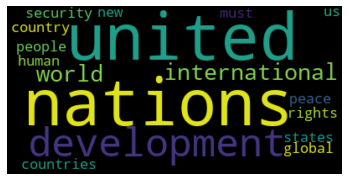

In [26]:
#2015 word cloud
plt.imshow(wordcloud2015, interpolation='bilinear')
plt.axis("off")
plt.show()

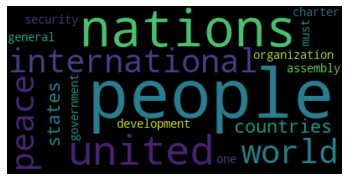

In [27]:
#1970 wordcloud
plt.imshow(wordcloud1970, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
#Countries that start with M

startsWithM = np.count_nonzero(undf.country.str.startswith('M'))
print(startsWithM)

663


In [29]:
uniqueM = undf.drop_duplicates("country") 

In [30]:
#Unique countries that start with M

uniqueStartsWithM = np.count_nonzero(uniqueM.country.str.startswith('M'))
print(uniqueStartsWithM)

18


In [31]:
#lowercase text since 'global' is lower case
undf["text"] = undf.text.str.lower()

#add column checking if the speech text contains global
undf["Global"] = undf.text.str.contains("global")
print(undf.shape)

(7507, 5)


In [32]:
#remove false entries in global column
textWithGlobal = undf[undf.Global]
textWithGlobal.shape

(5771, 5)

In [33]:
def getIndexPositionsOfWordsAfterGlobal(listOfElements, element):
    #Returns the indexes of all occurrences of given element in listOfElements
    
    indexPosList = []
    indexPos = 0
    while True:
        try:
            # Search for item in list from indexPos to the end of list
            indexPos = listOfElements.index(element, indexPos)
            # Add the index position in list
            indexPosList.append(indexPos)
            indexPos += 1
        except ValueError as e:
            break
    #add 1 to each index in list to find index of word after global
    indexPosList = [x+1 for x in indexPosList]
    return indexPosList

#apply function above
sub = "global"
textWithGlobal["LocationsAfterGlobal"] = textWithGlobal["text"].apply(lambda text: getIndexPositionsOfWordsAfterGlobal(text.split(),sub))
textWithGlobal.head()

<ipython-input-33-431593420ade>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textWithGlobal["LocationsAfterGlobal"] = textWithGlobal["text"].apply(lambda text: getIndexPositionsOfWordsAfterGlobal(text.split(),sub))


,session,year,country,text,Global,LocationsAfterGlobal
0,44,1989,MDV,﻿it is indeed a pleasure for me and the member...,True,"[357, 639, 967, 2112, 2233, 2328, 2466, 2919, ..."
1,44,1989,FIN,"﻿\nmay i begin by congratulating you. sir, on ...",True,"[401, 411, 474, 512, 614, 635, 1563, 2687, 2692]"
3,44,1989,URY,﻿\nduring the debate at the fortieth session o...,True,"[71, 1588]"
4,44,1989,ZWE,﻿i should like at the outset to express my del...,True,"[744, 1332]"
5,44,1989,PHL,"﻿before you began to occupy that exalted seat,...",True,"[33, 1001, 1500]"


In [34]:
def fn1(row):
    #creates a dict with k:v pairs of words and their frequency in the text
    tempDict = {}
    for index in row["LocationsAfterGlobal"]:
        word = row["lists"][index]
        if(word in tempDict.keys()):
            tempDict[word] = tempDict[word] + 1
        else:
            tempDict[word] = 1
    return tempDict


def helperfn(text):
    #returns a list of words from a string of text
    return text.split()


def keywithmaxval(d):
    #returns key in dict with highest value, in this case frequency
    try:
        k=list(d.keys())
        v=list(d.values())

        return k[v.index(max(v))]
    except:
        pass
    
    

#split text
textWithGlobal["lists"] = textWithGlobal['text'].apply(lambda txt: helperfn(txt))
#apply other two helpers
textWithGlobal['wordDict'] = textWithGlobal.apply(lambda row: fn1(row), axis=1)
textWithGlobal['topWordAfterGlobal'] = textWithGlobal['wordDict'].apply(lambda dictOfWords: keywithmaxval(dictOfWords))

textWithGlobal.head()

<ipython-input-34-747d9db57853>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textWithGlobal["lists"] = textWithGlobal['text'].apply(lambda txt: helperfn(txt))
<ipython-input-34-747d9db57853>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textWithGlobal['wordDict'] = textWithGlobal.apply(lambda row: fn1(row), axis=1)
<ipython-input-34-747d9db57853>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,session,year,country,text,Global,LocationsAfterGlobal,lists,wordDict,topWordAfterGlobal
0,44,1989,MDV,﻿it is indeed a pleasure for me and the member...,True,"[357, 639, 967, 2112, 2233, 2328, 2466, 2919, ...","[﻿it, is, indeed, a, pleasure, for, me, and, t...","{'political': 3, 'programme': 1, 'peace': 1, '...",political
1,44,1989,FIN,"﻿\nmay i begin by congratulating you. sir, on ...",True,"[401, 411, 474, 512, 614, 635, 1563, 2687, 2692]","[﻿, may, i, begin, by, congratulating, you., s...","{'challenges.': 1, 'level': 2, 'and': 1, 'chal...",level
3,44,1989,URY,﻿\nduring the debate at the fortieth session o...,True,"[71, 1588]","[﻿, during, the, debate, at, the, fortieth, se...","{'stage': 1, 'solidarity': 1}",stage
4,44,1989,ZWE,﻿i should like at the outset to express my del...,True,"[744, 1332]","[﻿i, should, like, at, the, outset, to, expres...","{'and': 1, 'warming': 1}",and
5,44,1989,PHL,"﻿before you began to occupy that exalted seat,...",True,"[33, 1001, 1500]","[﻿before, you, began, to, occupy, that, exalte...","{'counterattack': 1, 'attack': 1, 'underpinnin...",counterattack


In [35]:
#Most frequent word

#top and freq, does not consider columns where 'economic' is tied with another for most occurrences.

textWithGlobal['topWordAfterGlobal'].describe()


count         5509
unique        1078
top       economic
freq           285
Name: topWordAfterGlobal, dtype: object

In [36]:
#clean-up text data
undf['text'] = undf.text.str.replace('\ufeff','') # remove strange character
undf['text'] = undf.text.str.strip() # eliminate whitespace from beginning and end

undf.head()

,session,year,country,text,Global
0,44,1989,MDV,it is indeed a pleasure for me and the members...,True
1,44,1989,FIN,"may i begin by congratulating you. sir, on you...",True
2,44,1989,NER,"mr. president, it is a particular pleasure for...",False
3,44,1989,URY,during the debate at the fortieth session of t...,True
4,44,1989,ZWE,i should like at the outset to express my dele...,True


In [37]:
#What is the average word count per speech?

def helperfn2(text):
    return len(text.split())

#column with length (# of words) in speed text
undf["wordCount"] = undf['text'].apply(lambda txt: helperfn2(txt))

print(undf.wordCount.mean())

2865.413747169309


MDV   -618.726238
FIN   -832.292050
NER    -23.447101
URY    416.160607
ZWE   -105.184114
Name: CompareToAverage, dtype: float64

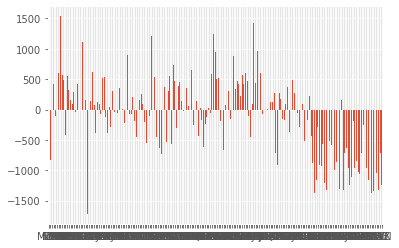

In [38]:
#How does that average word count compare across all of the countries' speeches?

listOfUniqueCountries = undf.country.unique()

dictOfUniqueCountryWC = {}

def findAverageWC(tempDict):
#this function returns a dictionary where keys are unique countries 
#and values are their average word count
    
    for uniqueCountry in listOfUniqueCountries:
        
        #focus on each unique country's data
        tempDF = undf[undf.country == uniqueCountry]
        
        #word count already in undf
        avgWC = tempDF.wordCount.mean()
        
        #create entry in dictionary
        dictOfUniqueCountryWC[uniqueCountry] = avgWC

#average ~2865 was found in cell above
def compareToAverage(aNum):
    return (aNum - 2865.4698281603837)
     
findAverageWC(dictOfUniqueCountryWC)
wordCountData = pd.DataFrame.from_dict(dictOfUniqueCountryWC, orient='index', columns=["AverageWordCount"])

#Average word count is 2865.4698281603837
wordCountData["CompareToAverage"] = wordCountData['AverageWordCount'].apply(lambda avgWC: compareToAverage(avgWC))
plotData = wordCountData["CompareToAverage"]

ax = plotData.plot.bar(x='Country', y='Distance From Average', rot=0)
plotData.head()

In [39]:
plotData.head

<bound method NDFrame.head of MDV    -618.726238
FIN    -832.292050
NER     -23.447101
URY     416.160607
ZWE    -105.184114
          ...     
VAT    -601.315982
MCO   -1047.904611
CHE   -1321.826971
KAZ    -710.636495
SVN   -1240.969828
Name: CompareToAverage, Length: 199, dtype: float64>

In [40]:
#A list of topics that the UN might discuss and debate. 

#creates a copy of original df
undf1 = undf.copy()


listOfTopics = ["peace", "nuclear war", "terrorism", "space travel","racism","equality","pandemic","happiness", "HIV", "global warming","climate change"]

undf1["peace"] = undf1.text.str.count("peace")
undf1["nuclear"] = undf1.text.str.count("nuclear war")
undf1["terrorism"] = undf1.text.str.count("terrorism")
undf1["space"] = undf1.text.str.count("space travel")
#undf1["space"] = undf1.text.str.count("space travel"|"moon landing")
undf1["racism"] = undf1.text.str.count("racism")
undf1["equality"] = undf1.text.str.count("equality")
undf1["pandemic"] = undf1.text.str.count("pandemic")
undf1["happiness"] = undf1.text.str.count("happiness")
undf1["HIV"] = undf1.text.str.count("hiv")
undf1["warming"] = undf1.text.str.count("global warming")
undf1["climate"] = undf1.text.str.count("climate change")

undf1.head()

,session,year,country,text,Global,wordCount,peace,nuclear,terrorism,space,racism,equality,pandemic,happiness,HIV,warming,climate
0,44,1989,MDV,it is indeed a pleasure for me and the members...,True,3011,15,0,3,0,0,2,0,0,0,1,0
1,44,1989,FIN,"may i begin by congratulating you. sir, on you...",True,2726,15,0,0,0,0,0,0,0,0,0,1
2,44,1989,NER,"mr. president, it is a particular pleasure for...",False,4859,27,0,3,0,0,3,0,1,0,0,0
3,44,1989,URY,during the debate at the fortieth session of t...,True,2710,16,0,2,0,1,2,0,0,0,0,0
4,44,1989,ZWE,i should like at the outset to express my dele...,True,4551,21,0,0,0,0,0,0,0,0,1,0


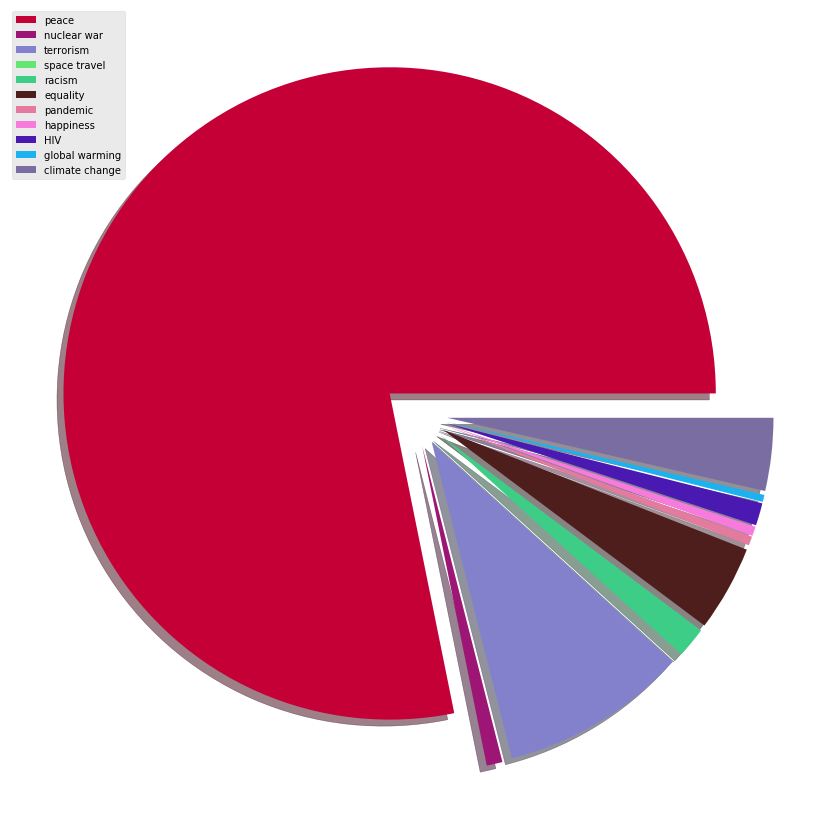

{'peace': 98830,
 'nuclear war': 992,
 'terrorism': 11749,
 'space travel': 3,
 'racism': 1914,
 'equality': 5378,
 'pandemic': 565,
 'happiness': 591,
 'HIV': 1406,
 'global warming': 440,
 'climate change': 4556}

In [41]:
#Graph to show how often these topics were mentioned. 

sumofpeace = undf1.peace.sum()
sumofnuclearwar = undf1.nuclear.sum()
sumofterrorism = undf1.terrorism.sum()
sumofspacetravel = undf1.space.sum()
sumofracism = undf1.racism.sum().sum()
sumofequality = undf1.equality.sum()
sumofpandemic = undf1.pandemic.sum()
sumofhappiness = undf1.happiness.sum()
sumofhiv = undf1.HIV.sum()
sumofwarming = undf1.warming.sum()
sumofcchange = undf1.climate.sum()

explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
listofFreqs = [sumofpeace,sumofnuclearwar,sumofterrorism,sumofspacetravel,sumofracism,sumofequality,sumofpandemic,sumofhappiness,sumofhiv,sumofwarming,sumofcchange]

# using zip() to convert 2 lists to a dictionary 
topicDataOverall = dict(zip(listOfTopics, listofFreqs)) 

colors=["#c40037","#9e1675","#8380cc","#65e673","#3dcd86","#4e1e1c","#e57a9f","#f77add","#4919b1","#1cb1ef","#7a6da1"]

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal") )
plt.pie([val for val in topicDataOverall.values()],shadow=True,explode=explode,labels=[keys for keys in topicDataOverall.keys()],labeldistance=None,colors=colors)
plt.legend(labels=topicDataOverall, loc="upper left")
plt.show()

topicDataOverall

In [42]:
listOfUniqueYears = undf1.year.unique()

listOfUniqueYears

array([1989, 1970, 2013, 1985, 2008, 1991, 1986, 2002, 1975, 1996, 2012,
       1997, 1978, 1988, 2010, 1984, 1995, 2009, 1971, 1976, 1983, 1979,
       1999, 2005, 1987, 1982, 1998, 2003, 2004, 1980, 2014, 2011, 1974,
       2015, 1993, 1977, 1981, 2000, 1992, 1990, 1973, 1994, 1972, 2006,
       2007, 2001])

In [43]:
#8.4.1 6)

#a. Make a graph to show the frequency with which various topics are discussed over the years. 

#The following uses the same topics as above

def countTopicinYears(tempDict):
    for uniqueYear in listOfUniqueYears:
        tempDict = {}
        
        #focus on each unique year as a df
        tempDF = undf1[undf1.year == uniqueYear]

        tempDict["peace"] = tempDF.peace.sum()
        tempDict["nuclear"] = tempDF.nuclear.sum()
        tempDict["terrorism"] = tempDF.terrorism.sum()
        tempDict["space"] = tempDF.space.sum()
        tempDict["racism"] = tempDF.racism.sum()
        tempDict["equality"] = tempDF.equality.sum()
        tempDict["pandemic"] = tempDF.pandemic.sum()
        tempDict["happiness"] = tempDF.happiness.sum()
        tempDict["HIV"] = tempDF.HIV.sum()
        tempDict["warming"] = tempDF.warming.sum()
        tempDict["climate"] = tempDF.climate.sum()
        
        dict_of_year_data[uniqueYear] = tempDict
   


In [44]:
dict_of_year_data = {}
countTopicinYears(dict_of_year_data)

In [45]:
yearTopicData = pd.DataFrame.from_dict(dict_of_year_data, orient='index', columns=['peace','nuclear','terrorism','space','racism','equality','pandemic','happiness','HIV','warming','climate'])

#sort by year, where year is index
yearTopicData = yearTopicData.sort_index()
yearTopicData.head()

,peace,nuclear,terrorism,space,racism,equality,pandemic,happiness,HIV,warming,climate
1970,1297,6,7,0,24,65,0,8,2,0,0
1971,1820,21,9,0,53,101,0,27,1,0,0
1972,1895,21,382,0,82,107,0,22,3,0,0
1973,2054,53,125,0,89,110,0,18,4,0,1
1974,1935,21,24,0,67,143,0,15,4,0,0


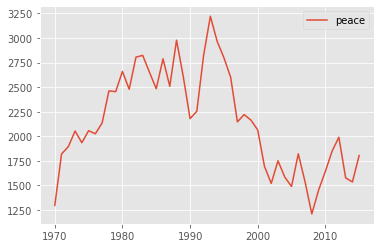

In [46]:
#line graphs showing changes in total word frequencies within all speeches accross the years

yearTopicData['peace'].plot(x="Year", y=["Count"], kind="line",legend=True)


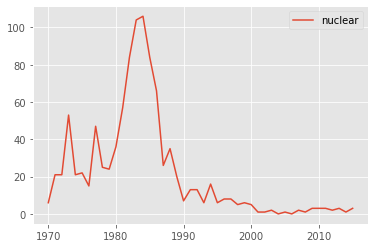

In [47]:
yearTopicData['nuclear'].plot(x="Year", y=["Count"], kind="line",legend=True)

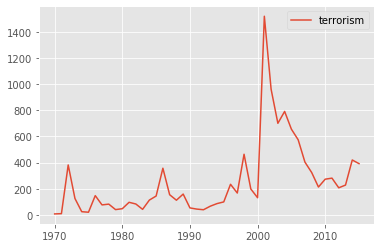

In [48]:
yearTopicData['terrorism'].plot(x="Year", y=["Count"], kind="line",legend=True)

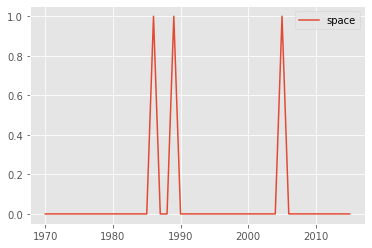

In [49]:
yearTopicData['space'].plot(x="Year", y=["Count"], kind="line",legend=True)

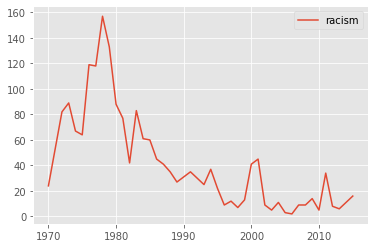

In [50]:
yearTopicData['racism'].plot(x="Year", y=["Count"], kind="line",legend=True)

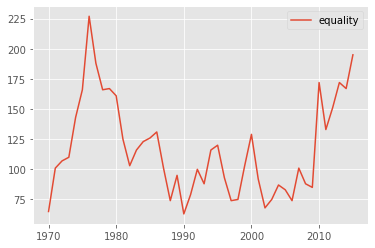

In [51]:
yearTopicData['equality'].plot(x="Year", y=["Count"], kind="line",legend=True)

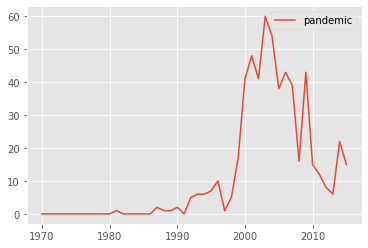

In [52]:
yearTopicData['pandemic'].plot(x="Year", y=["Count"], kind="line",legend=True)

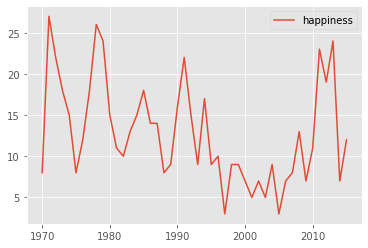

In [53]:
yearTopicData['happiness'].plot(x="Year", y=["Count"], kind="line",legend=True)

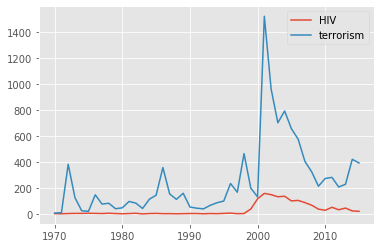

In [54]:
#What about ‘HIV’ or ‘terrorism’ or ‘global warming’.
yearTopicData['HIV'].plot(x="Year", y=["Count"], kind="line",legend=True)
yearTopicData['terrorism'].plot(x="Year", y=["Count"], kind="line",legend=True)

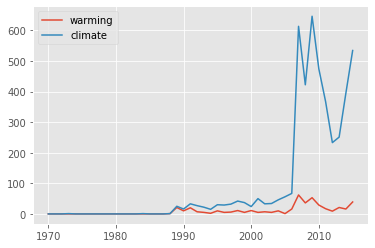

In [55]:
#Comparing two phrases like ‘global warming’ and ‘climate change’.
yearTopicData['warming'].plot(x="Year", y=["Count"], kind="line",legend=True)
yearTopicData['climate'].plot(x="Year", y=["Count"], kind="line",legend=True)

In [56]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def score_text(text):
    sentence_list = tokenize.sent_tokenize(text)
    cscore = 0.0
    for sent in sentence_list:
        ss = analyzer.polarity_scores(sent)['compound']
        cscore += ss
    return cscore / len(sentence_list)

In [57]:
score_text("This movie is horrible")

-0.5423

In [58]:
score_text("I love cute puppies")

0.802

In [59]:
undf['sentiment'] = undf.text.map(lambda t : score_text(t))

In [60]:
alt.data_transformers.enable('json')
alt.Chart(undf).mark_bar().encode(x=X('sentiment', bin=True), y='count()')

alt.Chart(...)

In [61]:
#Which countries are the most positive or negative in their speeches throughout the years?

#group by country
uniqueCountries = undf.groupby(['country'])

#find average sentiment of text for each country
avgSentiment = uniqueCountries['sentiment'].mean()

#max and min of the series defined above
avgSentiment.describe()

count    199.000000
mean       0.242241
std        0.058146
min        0.066121
25%        0.211212
50%        0.237993
75%        0.279126
max        0.491167
Name: sentiment, dtype: float64

In [62]:
#find country code for max and min
countryWithMaxSentiment = avgSentiment.idxmax()
countryWithMinSentiment = avgSentiment.idxmin()

In [63]:

#check values match describe function above 
print("Country with the max avg sentiment throughout the years is %s with an avg ss of %f"%(countryWithMaxSentiment,avgSentiment[countryWithMaxSentiment]))
print("Country with the min avg sentiment throughout the years is %s with an avg ss of %f"%(countryWithMinSentiment,avgSentiment[countryWithMinSentiment]))

Country with the max avg sentiment throughout the years is MNE with an avg ss of 0.491167
Country with the min avg sentiment throughout the years is CUB with an avg ss of 0.066121


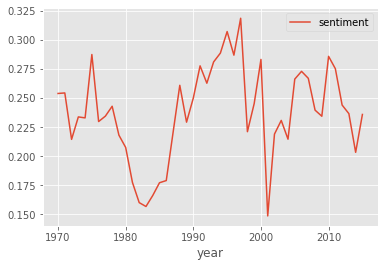

In [64]:
#Are there trends in positivity or negativity of speeches throughout the years?

#similar procedure as the previous question, except focusing on year rather than country

#group by year
uniqueYear = undf.groupby(['year'])

#find average sentiment of text for each year
avgSentimentbyYear = uniqueYear['sentiment'].mean()

#max and min of the series defined above

avgSentimentbyYear.plot(x="Year", y=["Average Sentiment"], kind="line",legend=True)

In [65]:
avgSentimentbyYear.describe()

count    46.000000
mean      0.237759
std       0.040571
min       0.148770
25%       0.218406
50%       0.236318
75%       0.266871
max       0.318664
Name: sentiment, dtype: float64

The average sentiment scores accross every decade is positive. However, from the graph above 
it is evident that the speeches started to have a slightly less positive sentiment from the 70's through 80's.
Also, from the early 80's through late 90's, the sentiment of speeches show an increase in overall sentiment score.
From 2000 onwards, there speeches have, overall, a less positive sentiment score than the previous decade.


end.